In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid')

In [3]:
df = pd.read_csv('city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [5]:
# 1 Which cities have the highest average AQI (Air Quality Index)?

highest_avg_aqi = df.groupby('City')['AQI'].mean().sort_values(ascending = False).head(10)
highest_avg_aqi

,AQI
City,
Ahmedabad,452.122939
Delhi,259.487744
Patna,240.782042
Gurugram,225.123882
Lucknow,217.973059
Talcher,172.886819
Jorapokhar,159.251621
Brajrajnagar,150.280505
Kolkata,140.566313


In [6]:
# 2 How does AQI vary by month or season?

df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Season'] = pd.to_datetime(df['Date']).dt.quarter

aqi_by_month = df.groupby('Month')['AQI'].mean()
aqi_by_season = df.groupby('Season')['AQI'].mean()

print(aqi_by_month)
print(aqi_by_season)

Month
1     231.674918
2     202.905197
3     164.735281
4     143.355120
5     135.489579
6     120.198379
7     111.854575
8     113.613176
9     115.191804
10    188.613552
11    241.681302
12    227.084980
Name: AQI, dtype: float64
Season
1    198.746104
2    132.978831
3    113.528404
4    219.491537
Name: AQI, dtype: float64


In [7]:
# 3 What pollutants are recorded, and what are their average levels?

pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'CO']
avg_pollutants = df[pollutants].mean()

print(avg_pollutants)

PM2.5     67.450578
PM10     118.127103
NO2       28.560659
SO2       14.531977
O3        34.491430
CO         2.248598
dtype: float64


In [8]:
# 4 Which city has the cleanest air on average?

cleanest_city = df.groupby('City')['AQI'].mean().idxmin()

print(cleanest_city)

Aizawl


In [9]:
# 5 Are there any missing data patterns in the dataset?

missing_data = df.isnull().sum()

print(missing_data)

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
Month             0
Season            0
dtype: int64


In [10]:
# 6 Which cities consistently exceed safe pollution limits?

city_exceed = df.groupby("City")["AQI"].apply(lambda x: (x > 100).mean() * 100)
city_exceed.sort_values(ascending=False).head()

,AQI
City,
Delhi,90.592334
Lucknow,75.311100
Gurugram,71.888029
Jaipur,69.389587
Patna,69.321851


In [12]:
# 7 How do pollution levels vary between weekdays and weekends?

df["Date"] = pd.to_datetime(df["Date"])
df["Days"]= pd.to_datetime(df["Date"]).dt.day_name()
df["Month"] = pd.to_datetime(df["Date"]).dt.month_name()

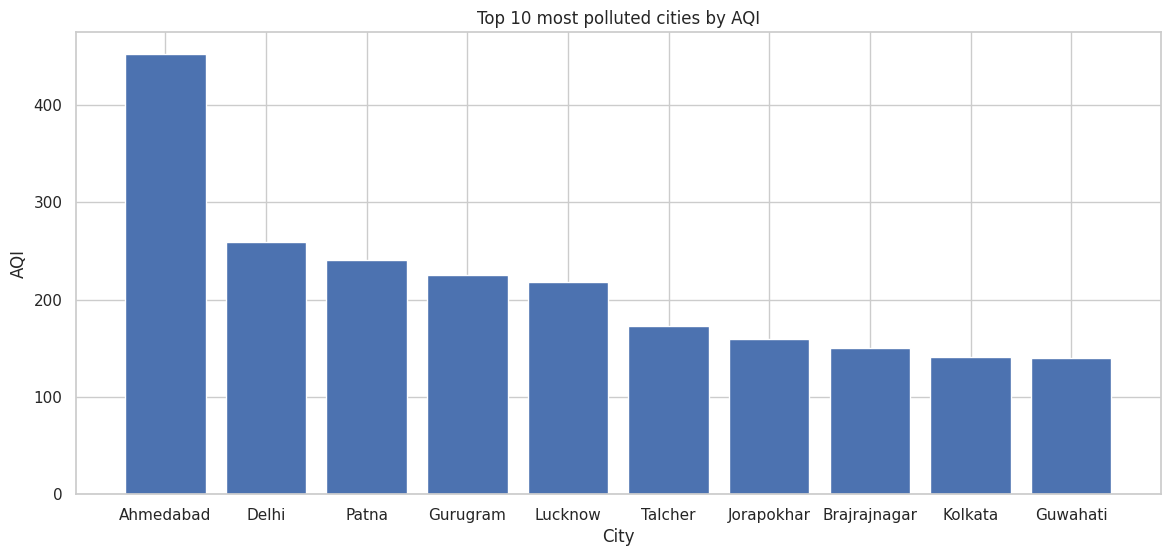

In [13]:
# 1 Bar chart of Top 10 most polluted cities by AQI.

mp = df.groupby("City")["AQI"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(14,6))
plt.bar(mp.index, mp.values)
plt.xlabel("City")
plt.ylabel("AQI")
plt.title("Top 10 most polluted cities by AQI")
plt.show()

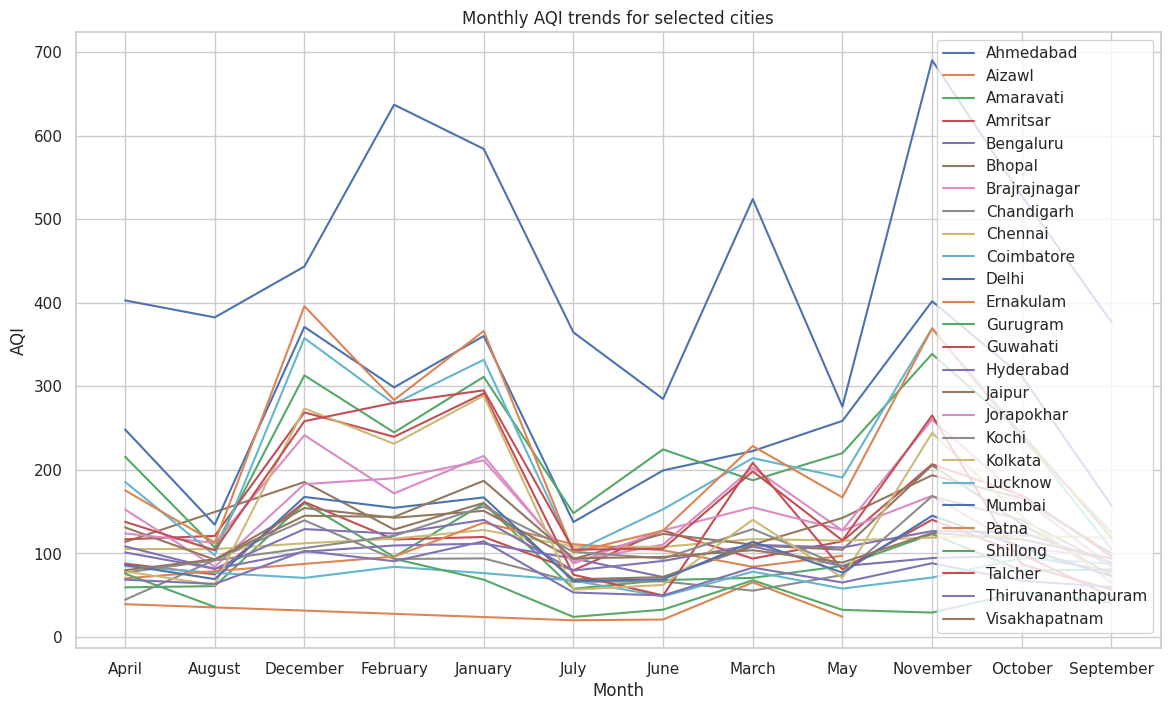

In [23]:
# 2 Line plot showing monthly AQI trends for selected cities.

v = df.groupby(["City","Month"])["AQI"].mean().reset_index()

plt.figure(figsize=(14,8))
for city in v['City'].unique():
    city_data = v[v['City'] == city]
    plt.plot(city_data['Month'], city_data['AQI'], label=city)
plt.xlabel("Month")
plt.ylabel("AQI")
plt.title("Monthly AQI trends for selected cities")
plt.legend()
plt.show()

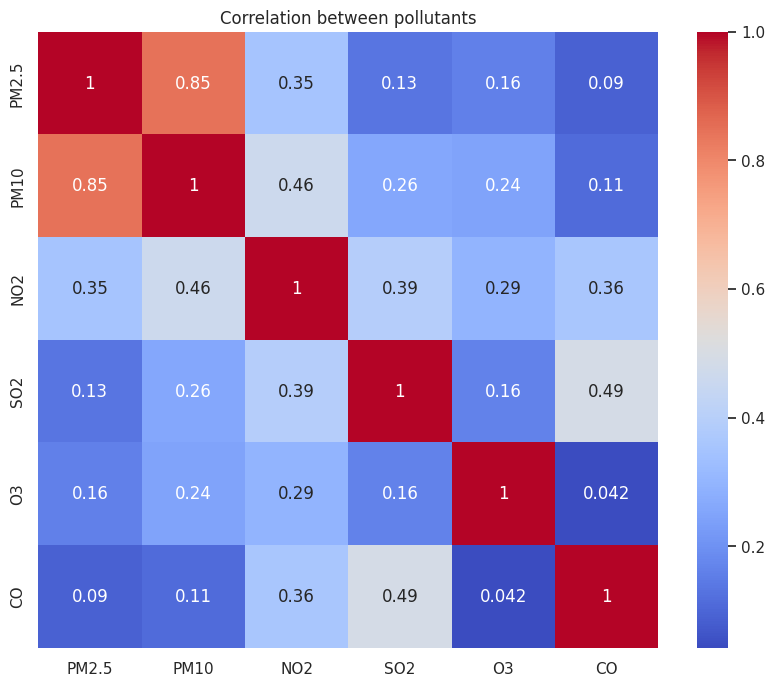

In [21]:
# 3 Heatmap showing correlation between pollutants (PM2.5, PM10, NO2, SO2, O3, CO).

corr = df[["PM2.5", "PM10", "NO2", "SO2", "O3", "CO"]].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation between pollutants")
plt.show()

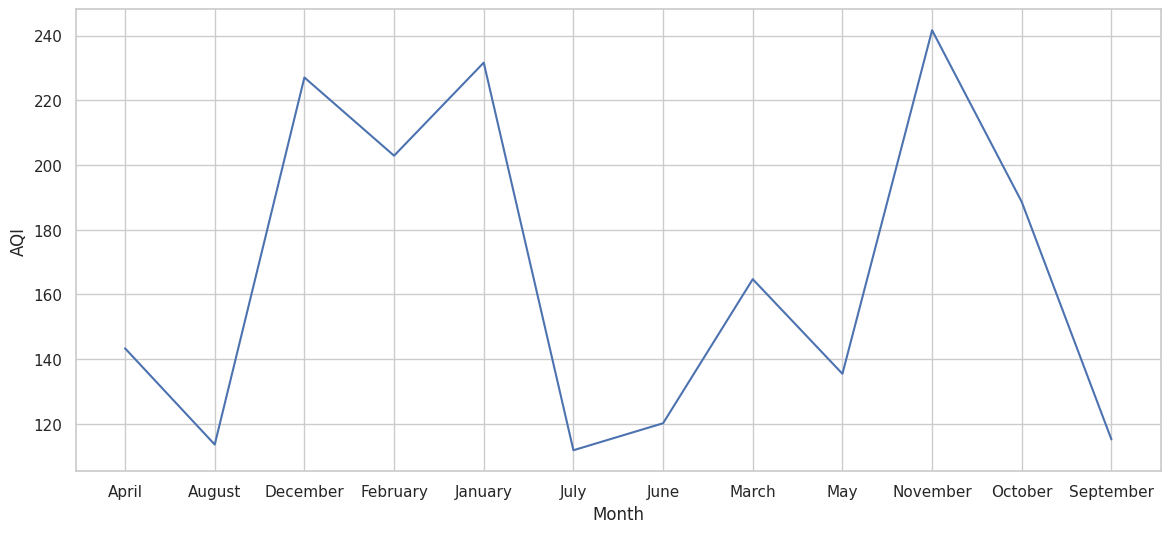

In [22]:
# 4 Seasonal comparison plot of average AQI levels.

df.groupby("Month")["AQI"].mean()
plt.figure(figsize=(14,6))
plt.plot(df.groupby("Month")["AQI"].mean().index, df.groupby("Month")["AQI"].mean().values)
plt.xlabel("Month")
plt.ylabel("AQI")
plt.show()

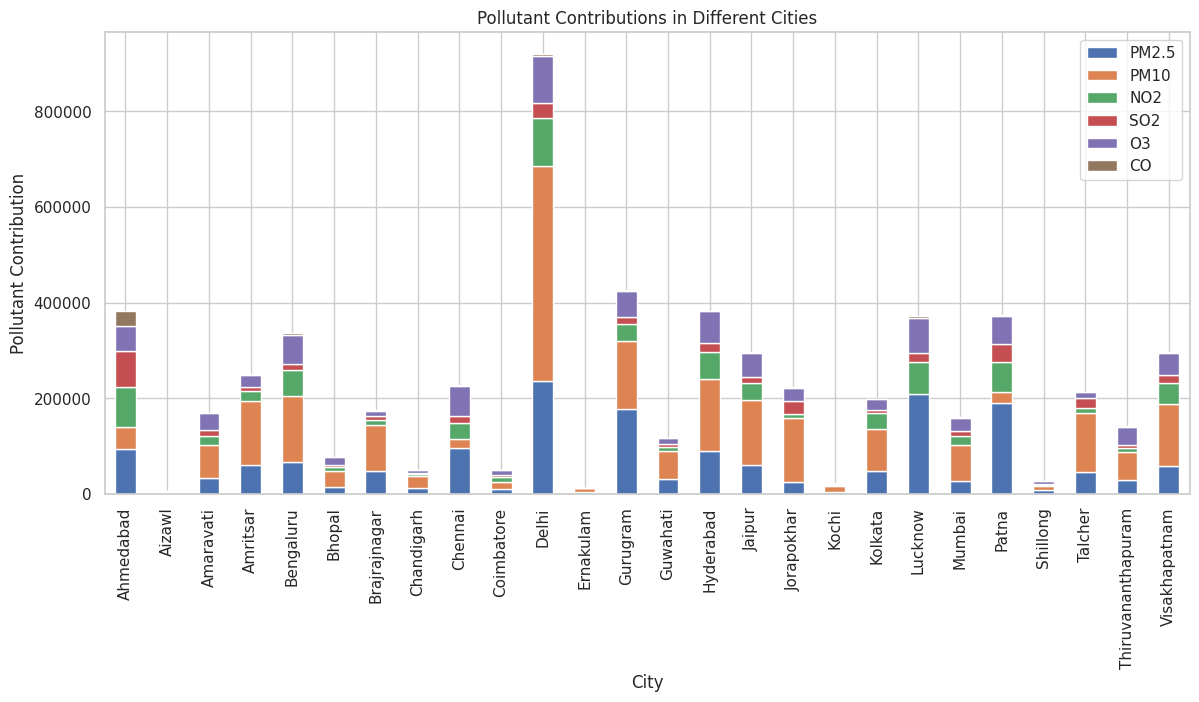

In [25]:
# 5 Stacked bar chart of pollutant contributions in different cities.

pollutant_contribution = df.groupby("City")[["PM2.5", "PM10", "NO2", "SO2", "O3", "CO"]].sum()
pollutant_contribution.plot(kind="bar", stacked=True, figsize=(14,6))
plt.xlabel("City")
plt.ylabel("Pollutant Contribution")
plt.title("Pollutant Contributions in Different Cities")
plt.show()

In [35]:
# 6 Map visualization showing geographic distribution of AQI values.

import folium
import pandas as pd

# Manually provided city coordinates (replace with actual coordinates)
city_coords = {
    'Ahmedabad': (23.0225, 72.5714),
    'Delhi': (28.7041, 77.1025),
    'Patna': (25.5941, 85.1376),
    'Gurugram': (28.4595, 77.0266),
    'Lucknow': (26.8467, 80.9462),
    'Talcher': (20.9577, 85.2097),
    'Jorapokhar': (23.7200, 86.4000),
    'Brajrajnagar': (21.8200, 83.9200),
    'Kolkata': (22.5726, 88.3639),
    'Guwahati': (26.1445, 91.7362),
    'Aizawl': (23.7271, 92.7176),
    'Amaravati': (16.5750, 80.3645),
    'Amritsar': (31.6340, 74.8737),
    'Bengaluru': (12.9716, 77.5946),
    'Bhopal': (23.2599, 77.4126),
    'Chandigarh': (30.7333, 76.7794),
    'Chennai': (13.0827, 80.2707),
    'Coimbatore': (11.0168, 76.9558),
    'Ernakulam': (9.9816, 76.2999),
    'Hyderabad': (17.3850, 78.4867),
    'Jaipur': (26.9124, 75.7873),
    'Kochi': (9.9312, 76.2673),
    'Mumbai': (19.0760, 72.8777),
    'Shillong': (25.5788, 91.8933),
    'Thiruvananthapuram': (8.5241, 76.9361),
    'Visakhapatnam': (17.6868, 83.2185)
}

# Create a new dataframe with city coordinates
city_coords_df = pd.DataFrame.from_dict(city_coords, orient='index', columns=['Latitude', 'Longitude'])
city_coords_df.index.name = 'City'

# Merge AQI data with city coordinates
aqi_geo_df = df.groupby('City')['AQI'].mean().reset_index()
aqi_geo_df = aqi_geo_df.merge(city_coords_df, on='City')

# Drop rows with missing AQI or coordinates
aqi_geo_df.dropna(subset=['AQI', 'Latitude', 'Longitude'], inplace=True)

# Create a Folium map centered around India
m = folium.Map(location=[20.5937, 78.9629], zoom_start=4)

# Add markers for each city with AQI information
for index, row in aqi_geo_df.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=row['AQI'] / 20, # Scale marker size by AQI
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        tooltip=f"City: {row['City']}<br>Average AQI: {row['AQI']:.2f}"
    ).add_to(m)

# Display the map
m

Text(0.5, 1.0, 'AQI Comparison Across Major Cities')

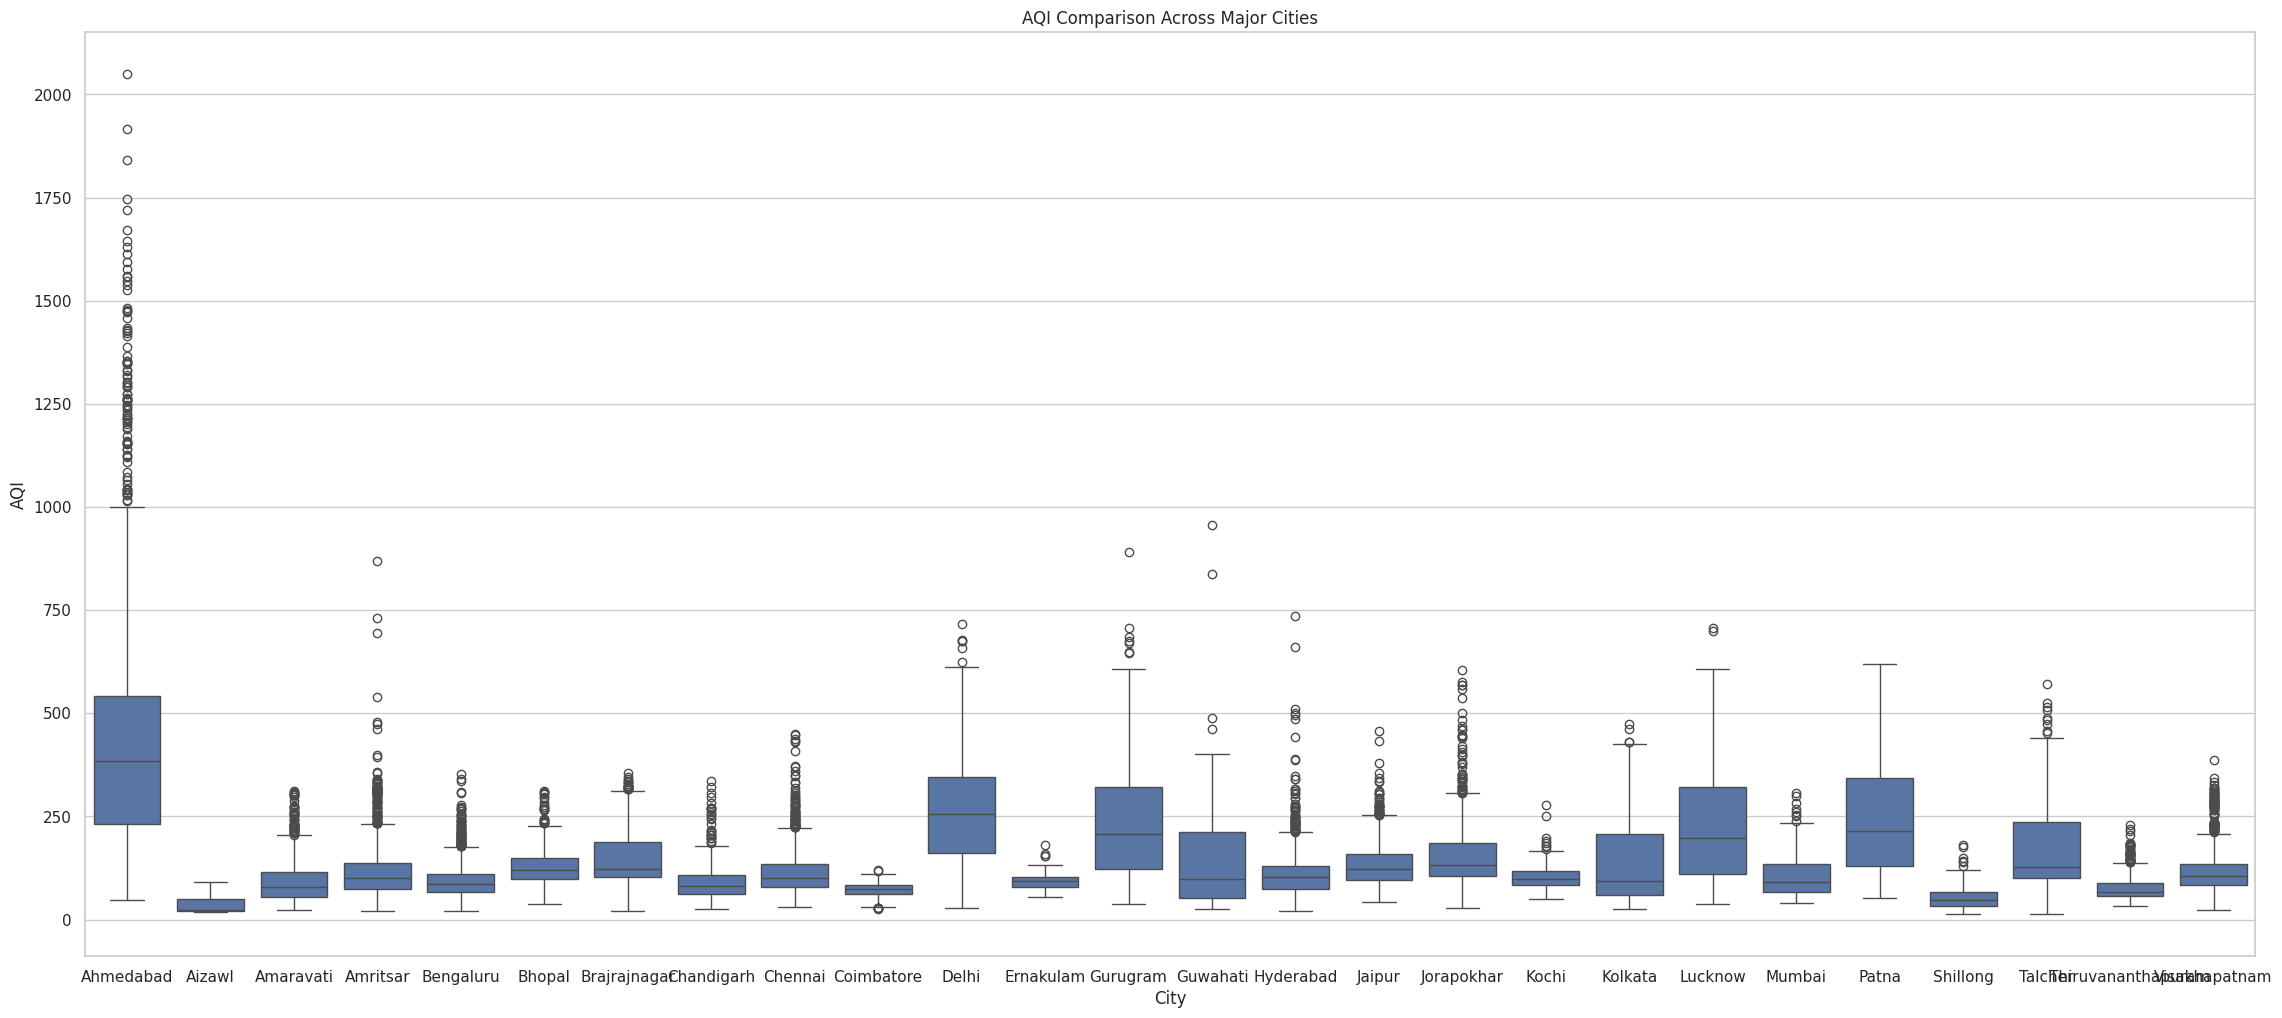

In [34]:
# 7 Boxplot comparing AQI across major cities.

plt.figure(figsize=(28,12))
sns.boxplot(x="City", y="AQI", data=df)
plt.xlabel("City")
plt.ylabel("AQI")
plt.title("AQI Comparison Across Major Cities")